In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm import tqdm

## CITE seq

In [2]:
# Read the healthy citeseq dataset 
healthy_codex_rna = sc.read_h5ad("/lustre/groups/ml01/workspace/alessandro.palma/scportrait/data/codex/cellfeaturization_results_healthy_processed.h5ad")

# Read scRNA-seq
scrnaseq = sc.read_h5ad("/lustre/groups/ml01/workspace/alessandro.palma/scportrait/data/scrnaseq/sce_converted_processed_discovery.h5ad")

**Check dataset**

In [3]:
healthy_codex_rna.X

array([[0.00075936, 0.00253278, 0.00029486, ..., 0.00403005, 0.00608833,
        0.00688261],
       [0.00353006, 0.00412112, 0.00061006, ..., 0.00920147, 0.00943141,
        0.02023545],
       [0.00323259, 0.00437655, 0.00057277, ..., 0.00815995, 0.01034758,
        0.0174938 ],
       ...,
       [0.00161846, 0.00206467, 0.0004533 , ..., 0.00648928, 0.00814765,
        0.00650052],
       [0.00212841, 0.001485  , 0.00034602, ..., 0.00516574, 0.00679512,
        0.00570626],
       [0.00076704, 0.00175326, 0.00036316, ..., 0.00456129, 0.00622648,
        0.00936614]], dtype=float32)

In [4]:
scrnaseq.X

array([[2.87997273, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [5.13941058, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.2890183 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.95297184, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.53255074, 0.        , 1.78594984, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

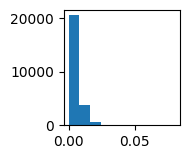

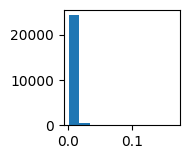

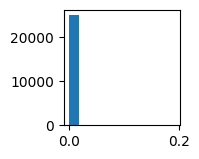

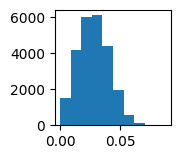

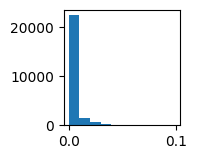

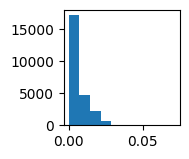

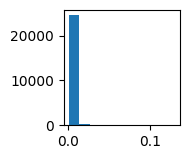

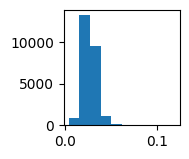

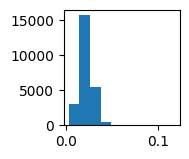

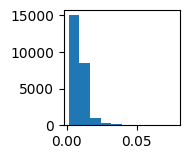

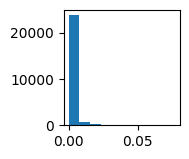

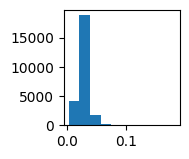

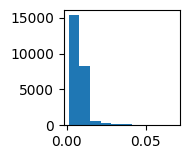

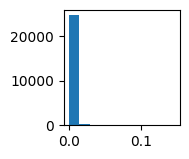

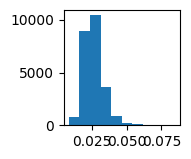

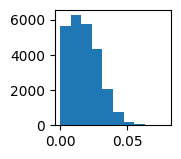

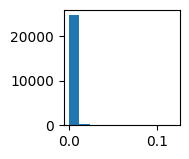

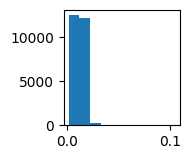

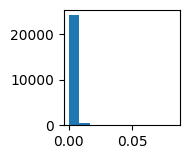

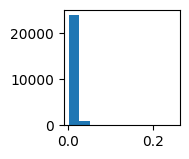

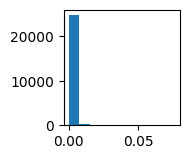

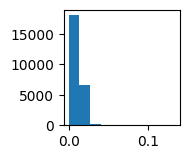

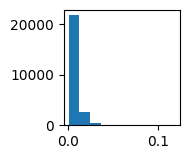

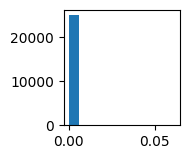

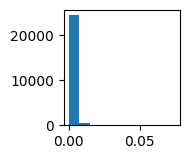

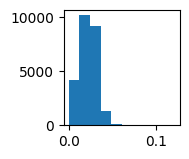

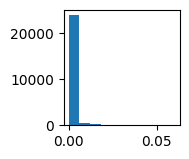

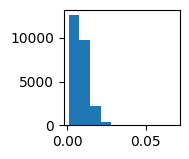

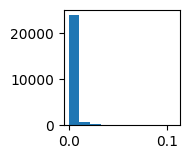

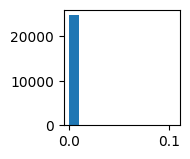

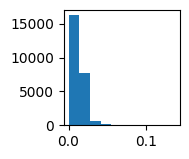

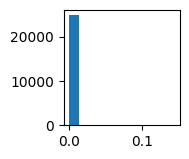

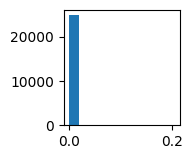

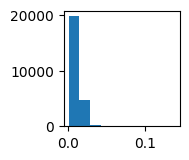

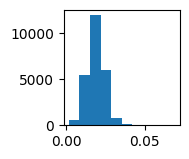

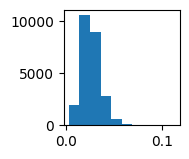

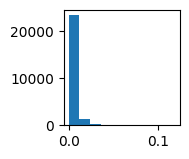

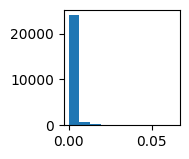

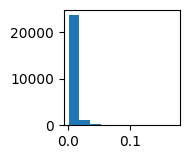

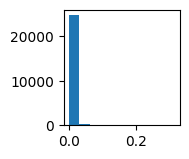

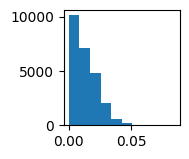

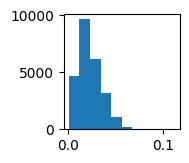

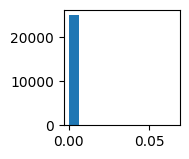

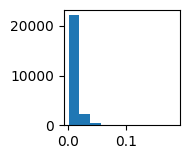

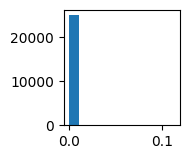

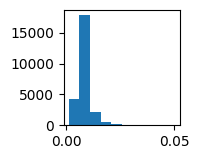

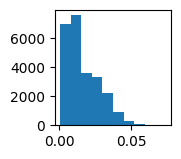

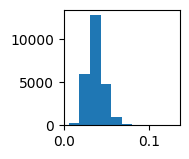

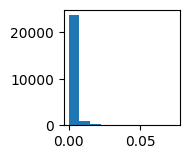

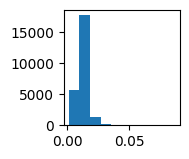

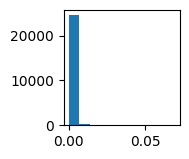

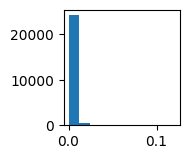

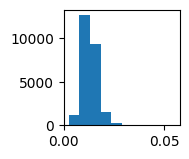

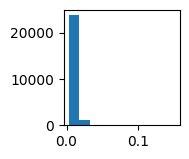

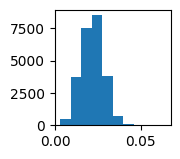

In [5]:
for i in range(healthy_codex_rna.X.shape[1]):
    plt.figure(figsize=(1.5, 1.5))
    plt.hist(healthy_codex_rna.X[:, i])
    plt.show()

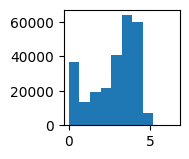

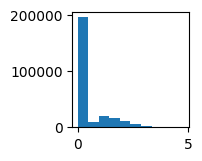

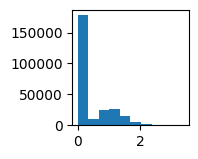

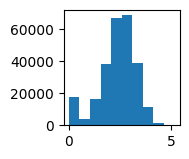

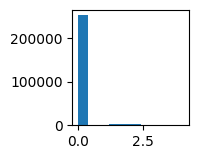

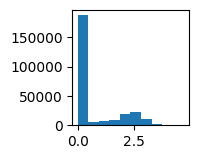

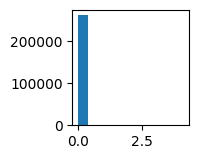

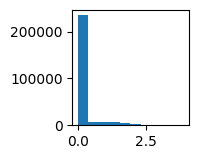

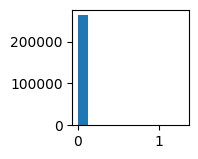

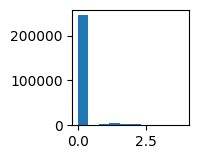

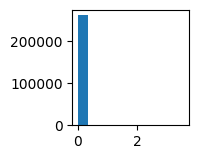

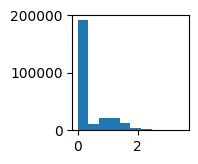

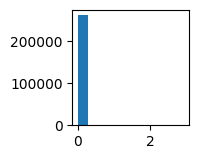

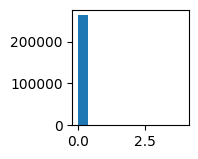

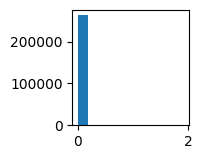

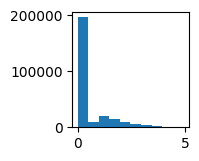

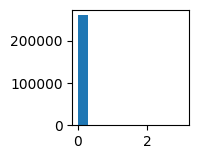

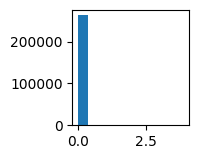

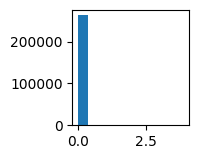

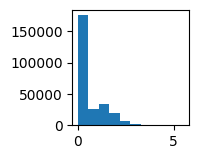

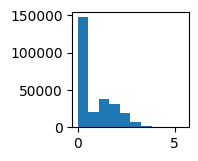

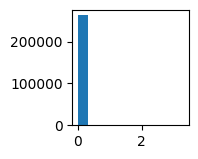

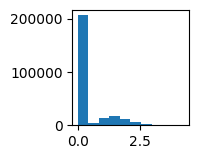

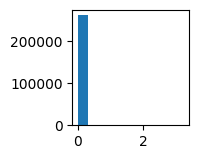

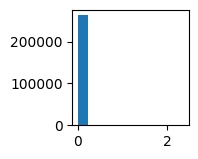

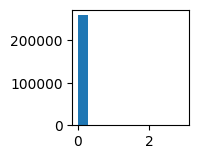

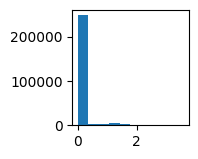

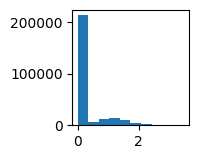

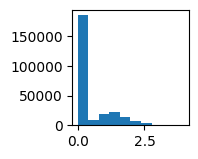

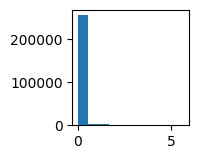

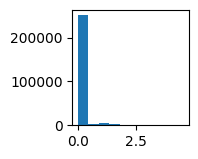

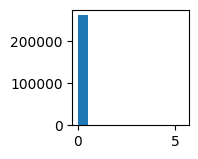

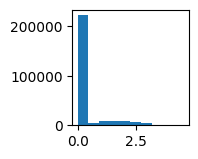

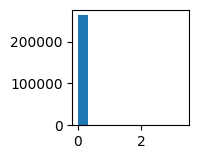

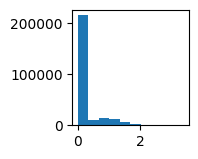

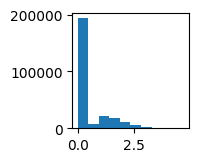

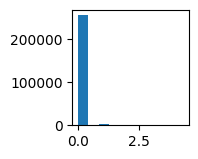

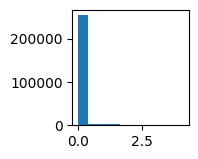

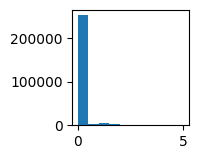

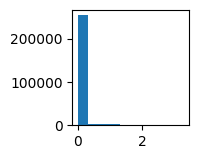

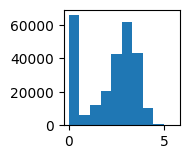

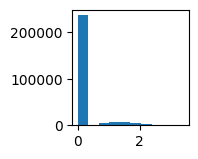

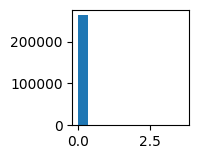

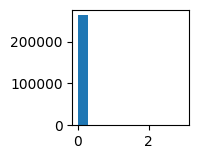

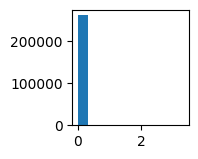

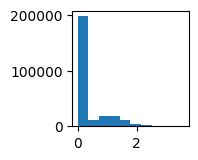

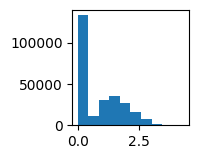

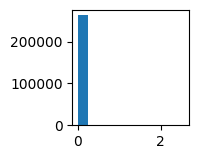

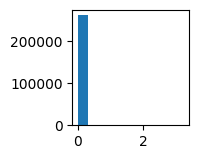

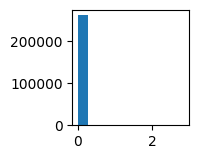

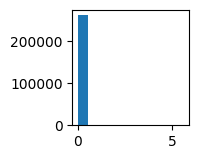

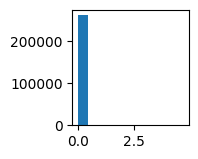

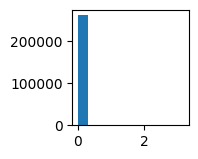

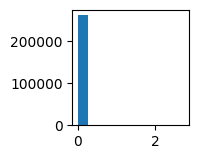

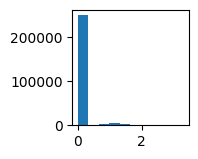

In [6]:
for i in range(scrnaseq.X.shape[1]):
    plt.figure(figsize=(1.5, 1.5))
    plt.hist(scrnaseq.X[:, i])
    plt.show()

#### Cosine distance

In [7]:
pairwise_distances = {"cl_id": [],
                      "ct_id": [], 
                      "distance": []
                     }

for cl_id in np.unique(healthy_codex_rna.obs.shared_leiden_cluster_id):
    X_cl_codex = healthy_codex_rna.X[healthy_codex_rna.obs.shared_leiden_cluster_id==cl_id]
    for ct_id in np.unique(scrnaseq.obs.annotation_figure_1):
        X_ct_rna = scrnaseq.X[scrnaseq.obs.annotation_figure_1==ct_id]   
        dist_cl_ct = np.mean(cdist(X_cl_codex, X_ct_rna, 'euclidean'))
        pairwise_distances["cl_id"].append(cl_id)
        pairwise_distances["ct_id"].append(ct_id)
        pairwise_distances["distance"].append(dist_cl_ct)

In [8]:
pairwise_distances = pd.DataFrame(pairwise_distances)

Cluster 0


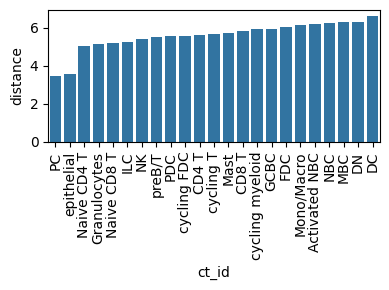

Cluster 1


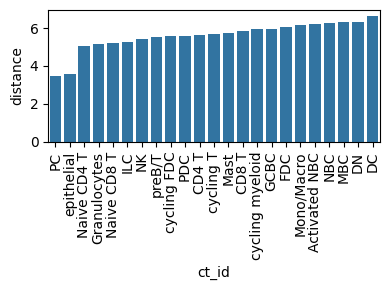

Cluster 10


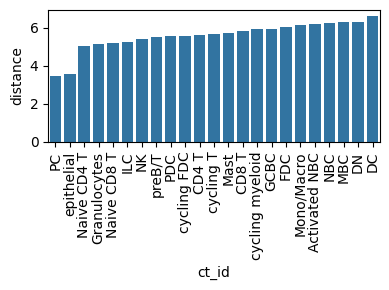

Cluster 11


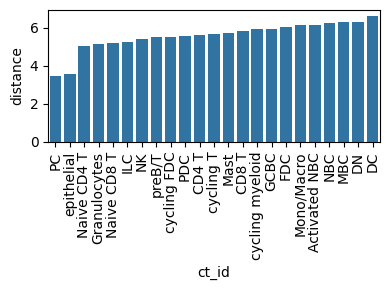

Cluster 12


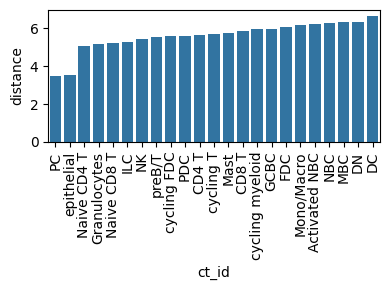

Cluster 13


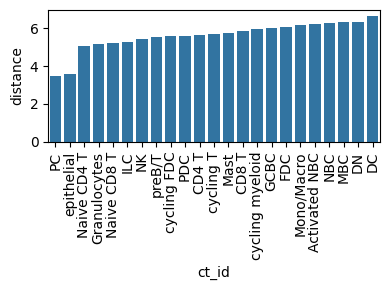

Cluster 14


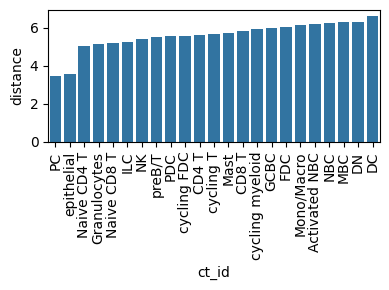

Cluster 2


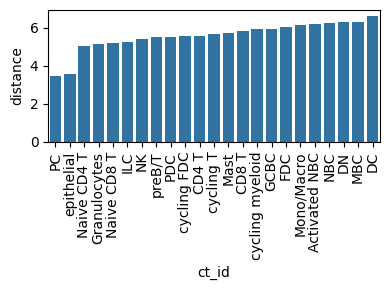

Cluster 3


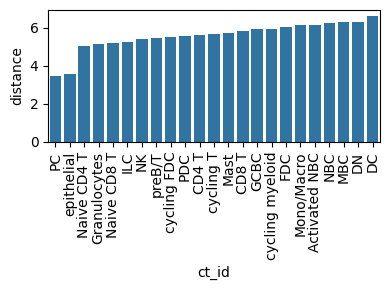

Cluster 4


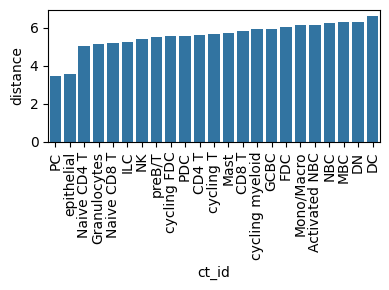

Cluster 5


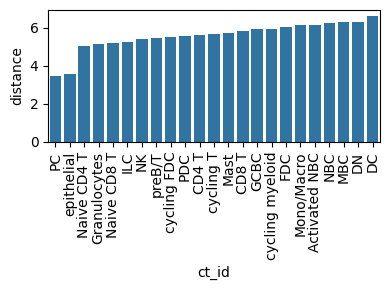

Cluster 6


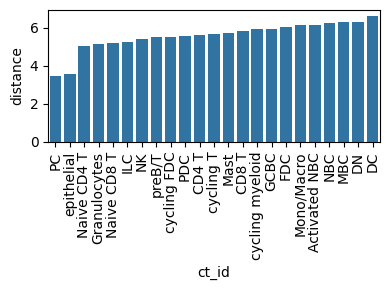

Cluster 7


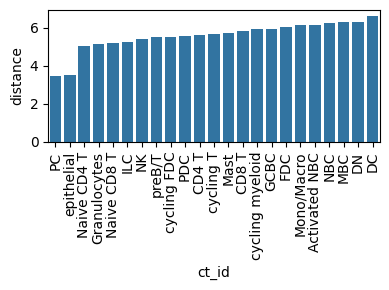

Cluster 8


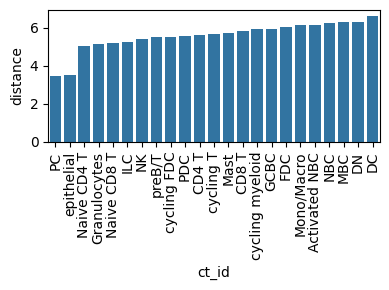

Cluster 9


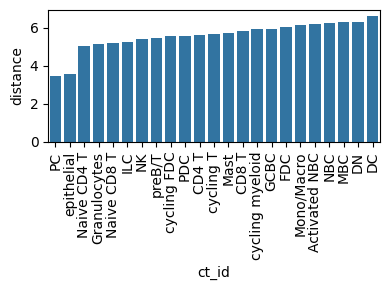

In [9]:
for cl in np.unique(pairwise_distances.cl_id):
    print(f"Cluster {cl}")
    pairwise_distances_cl = pairwise_distances[pairwise_distances.cl_id == cl]

    # Sort ct_id by distance
    ordered_ct_ids = pairwise_distances_cl.sort_values("distance")["ct_id"]

    plt.figure(figsize=(4, 3))
    sns.barplot(data=pairwise_distances_cl, x="ct_id", y="distance", order=ordered_ct_ids)

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [10]:
pairwise_distances[pairwise_distances.cl_id=="0"]

,cl_id,ct_id,distance
0,0,Activated NBC,6.184327
1,0,CD4 T,5.602412
2,0,CD8 T,5.819632
3,0,DC,6.611971
4,0,DN,6.312001
5,0,FDC,6.049490
6,0,GCBC,5.966985
7,0,Granulocytes,5.153307
8,0,ILC,5.254068
9,0,MBC,6.311139


In [11]:
pairwise_distances[pairwise_distances.cl_id=="1"]

,cl_id,ct_id,distance
23,1,Activated NBC,6.185850
24,1,CD4 T,5.614160
25,1,CD8 T,5.829766
26,1,DC,6.617392
27,1,DN,6.321672
28,1,FDC,6.052105
29,1,GCBC,5.968636
30,1,Granulocytes,5.156573
31,1,ILC,5.262653
32,1,MBC,6.313875
